# Analyse des dialogues dans l'Avare de Molière

Auteur : Emile Pierret

Nous proposons d'étudier la part de dialogue de chacun des personnages de l'Avare de Molière.

In [1]:
%matplotlib inline
import pylab as plt
import matplotlib.patches as mpatches
import numpy as np

#Version numpy : 1.15.2
#Version matplotlib  : 2.2.3
#python 3.6.4

## 1. Etude des données

Le texte utilisé a été télécharger au lien suivant: http://dramacode.github.io/markdown/moliere_avare.txt, le 1er avril 2023 à 14h09. Il est disponible sur le git, au nom de "moliere_avare.txt"

In [2]:
fichier = open("moliere_avare.txt", "r")

In [3]:
lignes = fichier.readlines()

In [4]:
k = 0
while lignes[k] != '# ACTEURS.\n' :
    k +=1

In [5]:
lignes[k]

'# ACTEURS.\n'

In [6]:
for k in range(19,33) :
    print(lignes[k])

 – Harpagon, Père de Cléante et d'Élise, et Amoureux de Mariane.

 – Cléante, Fils d'Harpagon, Amant de Mariane.

 – Élise, Fille d'Harpagon, Amante de Valère.

 – Valère, Fils d'Anselme, et Amant d'Élise.

 – Mariane, Amante de Cléante, et aimée d'Harpagon.

 – Anselme, Père de Valère et de Mariane.

 – Frosine, Femme d'Intrigue.

 – Maitre Simon, Courtier.

 – Maitre Jacques, Cuisinier et Cocher d'Harpagon.

 – La Flèche, Valet de Cléante.

 – Dame Claude, Servante d'Harpagon.

 – Brindavoine, laquais d'Harpagon.

 – La Merluche, laquais d'Harpagon.

 – Le commissaire, et son clerc.



In [7]:
caractères = []
for k in range(len(lignes)) :
    ligne = lignes[k]
    for i in range(len(ligne)) :
        if not(ligne[i] in caractères) :
            caractères.append(ligne[i])

In [8]:
caractères

['-',
 '\n',
 'i',
 'd',
 'e',
 'n',
 't',
 'f',
 'r',
 ':',
 ' ',
 'm',
 'o',
 'l',
 '_',
 'a',
 'v',
 'c',
 'M',
 'è',
 '.',
 '1',
 '6',
 '8',
 'L',
 "'",
 'A',
 'C',
 'é',
 'V',
 'R',
 'E',
 ',',
 'O',
 'É',
 'D',
 'I',
 'P',
 'J',
 'B',
 'È',
 'À',
 'S',
 'h',
 'z',
 'N',
 'U',
 'u',
 's',
 'à',
 'g',
 'p',
 'X',
 '*',
 'G',
 '#',
 'T',
 '–',
 'H',
 'x',
 'F',
 'q',
 'b',
 '?',
 'j',
 '!',
 'ù',
 'y',
 'î',
 'ê',
 '\xa0',
 ';',
 'œ',
 'ç',
 'ô',
 'â',
 'û',
 'ï',
 'Q',
 '…',
 'Ê',
 'Ô',
 'Y',
 'Î',
 '<',
 '>']

In [9]:
lettres = ['i',
 'd',
 'e',
 'n',
 't',
 'f',
 'r',
 'm',
 'o',
 'l',
 'a',
 'v',
 'c',
 'M',
 'è',
 'L',
 'A',
 'C',
 'é',
 'V',
 'R',
 'E',
 'O',
 'É',
 'D',
 'I',
 'P',
 'J',
 'B',
 'È',
 'À',
 'S',
 'h',
 'z',
 'N',
 'U',
 'u',
 's',
 'à',
 'g',
 'p',
 'X',
 'G',
 'T',
 'H',
 'x',
 'F',
 'q',
 'b',
 'j',
 'ù',
 'y',
 'î',
 'ê',
 'œ',
 'ç',
 'ô',
 'â',
 'û',
 'ï',
 'Q',
 'Ê',
 'Ô',
 'Y',
 'Î']

In [10]:
def split_string(s) :
    n = len(s)
    liste_mots = []
    k = 0
    while k < n :
        mot = ""
        while (k < n) and not (s[k] in lettres) :
            k +=1
        if k <n :
            mot += s[k]
            k+=1
            while (k < n) and (s[k] in lettres) :
                mot += s[k]
                k +=1
            k+=1
            liste_mots.append(mot)
    return liste_mots

In [11]:
split_string(lignes[48])

['Hé',
 'quoi',
 'charmante',
 'Élise',
 'vous',
 'devenez',
 'mélancolique',
 'après',
 'les',
 'obligeantes',
 'assurances',
 'que',
 'vous',
 'avez',
 'eu',
 'la',
 'bonté',
 'de',
 'me',
 'donner',
 'de',
 'votre',
 'foi',
 'Je',
 'vous',
 'vois',
 'soupirer',
 'hélas',
 'au',
 'milieu',
 'de',
 'ma',
 'joie',
 'Est',
 'ce',
 'du',
 'regret',
 'dites',
 'moi',
 'de',
 'm',
 'avoir',
 'fait',
 'heureux',
 'et',
 'vous',
 'repentez',
 'vous',
 'de',
 'cet',
 'engagement',
 'où',
 'mes',
 'feux',
 'ont',
 'pu',
 'vous',
 'contraindre']

In [12]:
persos = []
for k in range(19,33) :
    l = lignes[k]
    i = 3
    perso = ""
    while l[i] != "," :
        perso += l[i]
        i+=1
    persos.append("    "+perso.upper()+".\n")
print(persos)
persos[7] = '    MAÎTRE SIMON.\n'
persos[8] = '    MAÎTRE JACQUES.\n'
Nombre_repliques = {}
for perso in persos :
    Nombre_repliques[perso] = 0

Nombre_mots = {}
for perso in persos :
    Nombre_mots[perso] = 0

Nombre_scènes = {}
for perso in persos :
    Nombre_scènes[perso] = 0

Nombre_actes = {}
for perso in persos :
    Nombre_actes[perso] = []

['    HARPAGON.\n', '    CLÉANTE.\n', '    ÉLISE.\n', '    VALÈRE.\n', '    MARIANE.\n', '    ANSELME.\n', '    FROSINE.\n', '    MAITRE SIMON.\n', '    MAITRE JACQUES.\n', '    LA FLÈCHE.\n', '    DAME CLAUDE.\n', '    BRINDAVOINE.\n', '    LA MERLUCHE.\n', '    LE COMMISSAIRE.\n']


In [96]:
dico_acte = {}
acte_courant = 0
k = 33
non_habituel = []
nontraitée = []
perso_prec = 0
while k < len(lignes) :
    l = lignes[k]
    est_perso = False
    for perso in persos :
        if perso[4:-2] in l :
            k+=2 
            est_perso = True
            if (k-perso_prec) > 3 :
                non_habituel.append(k)
            perso_prec = k
    if l[:2] == '##' :
        k +=2
    elif l == '\n' :
        k+=1
    elif not (est_perso) :
        nontraitée.append(l)
        k+=1

In [98]:
nontraitée

['La Scène est à Paris.\n',
 "# L'Avare, *Comédie.*.\n",
 'À part.\n',
 "J'enrage.\n",
 'Haut.\n',
 "Je demande si malicieusement tu n'irais point faire courir le bruit que j'en ai.\n",
 'Il lève la main pour lui donner un soufflet.\n',
 "Sors d'ici, encore une fois.\n",
 "Ces grands hauts-de-chausses sont propres à devenir les recéleurs des choses qu'on dérobe ; et je voudrais qu'on en eût fait pendre quelqu'un.\n",
 'Il fouille dans les poches de la Flèche.\n',
 "Ici le frère et la sœur paraissent s'entretenant bas.\n",
 "Ô Ciel ! je me serai trahi moi-même.La chaleur m'aura emporté ; et je crois que j'ai parlé haut en raisonnant tout seul. Qu'est-ce ?\n",
 "Je ne veux point me marier, mon Père, s'il vous plaît.\n",
 "Et moi, ma petite Fille ma mie, je veux que vous vous mariiez, s'il vous plaît.\n",
 "Ouais. Il me semble que j'entends un Chien qui aboie. N'est-ce point qu'on en voudrait à mon argent ? Ne bougez, je reviens tout à l'heure.\n",
 'Il aperçoit Harpagon.\n',
 "Oui, il fa

In [85]:
non_traitée = [
 "J'enrage.\n",
 "Je demande si malicieusement tu n'irais point faire courir le bruit que j'en ai.\n",
 "Sors d'ici, encore une fois.\n",
 "Ces grands hauts-de-chausses sont propres à devenir les recéleurs des choses qu'on dérobe ; et je voudrais qu'on en eût fait pendre quelqu'un.\n",
 "Ô Ciel ! je me serai trahi moi-même.La chaleur m'aura emporté ; et je crois que j'ai parlé haut en raisonnant tout seul. Qu'est-ce ?\n",
 "Je ne veux point me marier, mon Père, s'il vous plaît.\n",
 "Et moi, ma petite Fille ma mie, je veux que vous vous mariiez, s'il vous plaît.\n",
 "Ouais. Il me semble que j'entends un Chien qui aboie. N'est-ce point qu'on en voudrait à mon argent ? Ne bougez, je reviens tout à l'heure.\n",
 "Oui, il faut qu'une fille obéisse à son Père. Il ne faut point qu'elle regarde comme un Mari est fait ; et lorsque la grande raison de *sans dot* s'y rencontre, elle doit être prête à prendre tout ce qu'on lui donne.\n",
 "J'ai un Procès que je suis sur le point de perdre, faute d'un peu d'argent ; et vous pourriez facilement me procurer le gain de ce Procès, si vous aviez quelque bonté pour moi.\n",
 "Vous ne sauriez croire le plaisir qu'elle aura de vous voir. Ah ! que vous lui plairez ! et que votre fraise à l'antique fera sur son esprit un effet admirable ! Mais, surtout, elle sera charmée de votre haut-de-chausses, attaché au pourpoint avec des aiguillettes.C'est pour la rendre folle de vous ; et un Amant aiguilletté sera pour elle un ragoût merveilleux.\n",
 "En vérité, Monsieur, ce Procès m'est d'une conséquence tout à fait grande. Je suis ruinée, si je le perds ; et quelque petite assistance me rétablirait mes affaires.\n",
 "Je voudrais que vous eussiez vu le ravissement où elle était, à m'entendre parler de vous. La joie éclatait dans ses yeux, au récit de vos qualités ; et je l'ai mise enfin dans une impatience extrême, de voir ce mariage entièrement conclu.\n",
 'Je vous prie, Monsieur, de me donner le petit secours que je vous demande. Cela me remettra sur pied ; et je vous en serai éternellement obligée.\n',
 "Bon, vous voilà les armes à la mainJe vous commets au soin de nettoyer partout ; et surtout, prenez garde de ne point frotter les meubles trop fort, de peur de les user.Outre cela, je vous constitue, pendant le souper, au gouvernement des bouteilles ; et s'il s'en écarte quelqu'une, et qu'il se casse quelque chose, je m'en prendrai à vous, et le rabattrai sur vos gages.\n",
 "Harpagon met son chapeau au-devant de son pourpoint, pour montrer à Brindavoine comment il doit faire pour cacher la tache d'huile.\n",
 "Et vous, tenez toujours votre chapeau ainsi, lorsque vous servirez. Pour vous, ma Fille, vous aurez l'œil sur ce que l'on desservira, et prendrez garde qu'il ne s'en fasse aucun dégât. Cela sied bien aux Filles. Mais cependant préparez-vous à bien recevoir ma Maîtresse, qui vous doit venir visiter, et vous mener avec elle à la Foire. Entendez-vous ce que je vous dis ?\n",
 'Vous dites…\n',
 'Apprenez que vous êtes un mauvais railleur.\n',
 'Il faut que vous le voyiez de près.\n',
 "Nenni, Madame, il est en de trop belles mains. C'est un présent que mon Père vous a fait.\n",
 'Monsieur…\n',
 "Hé bien, votre Fils n'est pas si étrange que vous le dites, et il se met à la raison. Il dit qu'il sait le respect qu'il vous doit, qu'il ne s'est emporté que dans la première chaleur, et qu'il ne fera point refus de se soumettre à ce qu'il vous plaira, pourvu que vous vouliez le traiter mieux que vous ne faites, et lui donner quelque Personne en mariage, dont il ait lieu d'être content.\n",
 "Laissez-moi faire. Hé bien, votre Père n'est pas si déraisonnable que vous le faites\xa0; et il m'a témoigné que ce sont vos emportements qui l'ont mis en colère\xa0; qu'il n'en veut seulement qu'à votre manière d'agir, et qu'il sera fort disposé à vous accorder ce que vous souhaitez, pourvu que vous vouliez vous y prendre par la douceur, et lui rendre les déférences, les respects, et les soumissions qu'un Fils doit à son père.\n",
 "Il tire son mouchoir de sa poche\xa0; ce qui fait croire à maître Jacques qu'il va lui donner quelque chose.\n",
 "Au voleur, au voleur, à l'assassin, au meurtrier.Justice, juste Ciel.Je suis perdu, je suis assassiné, on m'a coupé la gorge, on m'a dérobé mon argent. Qui peut-ce être ? qu'est-il devenu ? où est-il ? où se cache-t-il ? que ferai-je pour le trouver ? où courir ? où ne pas courir ? n'est-il point là ? n'est-il point ici ? qui est-ce ? Arrête. Rends-moi mon argent, coquin…\n",
 "Ah, c'est moi.Mon esprit est troublé, et j'ignore où je suis, qui je suis, et ce que je fais. Hélas, mon pauvre argent, mon pauvre argent, mon cher ami, on m'a privé de toi\xa0; et puisque tu m'es enlevé, j'ai perdu mon support, ma consolation, ma joie, tout est fini pour moi, et je n'ai plus que faire au monde.Sans toi, il m'est impossible de vivre. C'en est fait, je n'en puis plus, je me meurs, je suis mort, je suis enterré. N'y a-t-il personne qui veuille me ressusciter, en me rendant mon cher argent, ou en m'apprenant qui l'a pris ? Euh ? que dites-vous ? Ce n'est personne.Il faut, qui que ce soit qui ait fait le coup, qu'avec beaucoup de soin on ait épié l'heure\xa0; et l'on a choisi justement le temps que je parlais à mon traître de Fils. Sortons. Je veux aller quérir la justice, et faire donner la Question à toute la Maison\xa0; à Servantes, à Valets, à Fils, à Fille, et à moi aussi. Que de gens assemblés ! Je ne jette mes regards sur personne, qui ne me donne des soupçons, et tout me semble mon voleur. Eh ! de quoi est-ce qu'on parle là ? de celui qui m'a dérobé ?Quel bruit fait-on là-haut ? est-ce mon voleur qui y est ? De grâce, si l'on sait des nouvelles de mon voleur, je supplie que l'on m'en dise. N'est-il point caché là parmi vous ? Ils me regardent tous, et se mettent à rire. Vous verrez qu'ils ont part, sans doute, au vol que l'on m'a fait. Allons vite, des Commissaires, des Archers, des Prévôts, des Juges, des Gênes, des Potences et des Bourreaux. Je veux faire pendre tout le monde\xa0; et si je ne retrouve mon argent, je me pendrai moi-même après.\n"]

In [86]:
print(len(non_traitée))

27


In [26]:
dict(sorted(Nombre_mots.items(), key=lambda item:item[1]))

{'    DAME CLAUDE.\n': 0,
 '    BRINDAVOINE.\n': 81,
 '    LA MERLUCHE.\n': 103,
 '    MAÎTRE SIMON.\n': 383,
 '    LE COMMISSAIRE.\n': 575,
 '    ANSELME.\n': 1005,
 '    MARIANE.\n': 1748,
 '    ÉLISE.\n': 1820,
 '    MAÎTRE JACQUES.\n': 2767,
 '    LA FLÈCHE.\n': 2922,
 '    FROSINE.\n': 4177,
 '    VALÈRE.\n': 5205,
 '    CLÉANTE.\n': 6501,
 '    HARPAGON.\n': 10649}

In [27]:
dict(sorted(Nombre_repliques.items(), key=lambda item:item[1]))

{'    DAME CLAUDE.\n': 0,
 '    BRINDAVOINE.\n': 6,
 '    MAÎTRE SIMON.\n': 10,
 '    LA MERLUCHE.\n': 10,
 '    LE COMMISSAIRE.\n': 34,
 '    ANSELME.\n': 40,
 '    MARIANE.\n': 54,
 '    ÉLISE.\n': 100,
 '    FROSINE.\n': 118,
 '    LA FLÈCHE.\n': 128,
 '    MAÎTRE JACQUES.\n': 166,
 '    VALÈRE.\n': 198,
 '    CLÉANTE.\n': 320,
 '    HARPAGON.\n': 688}

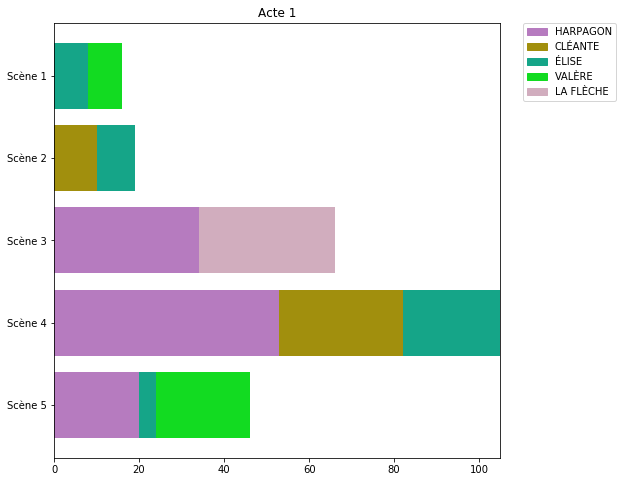

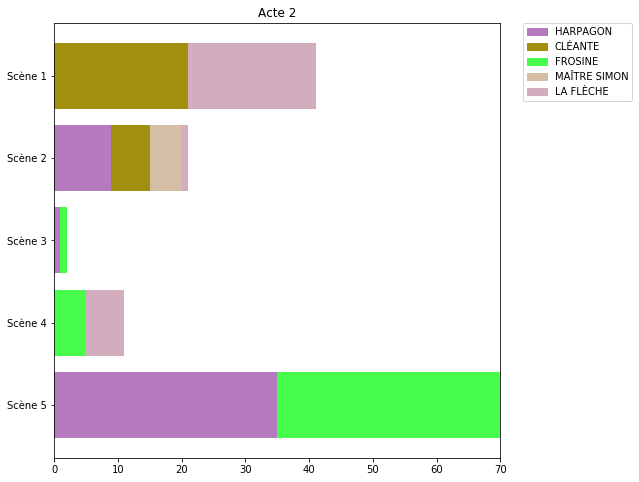

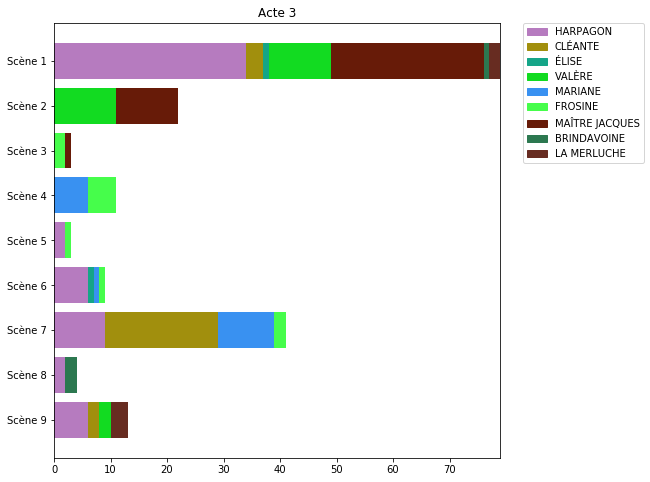

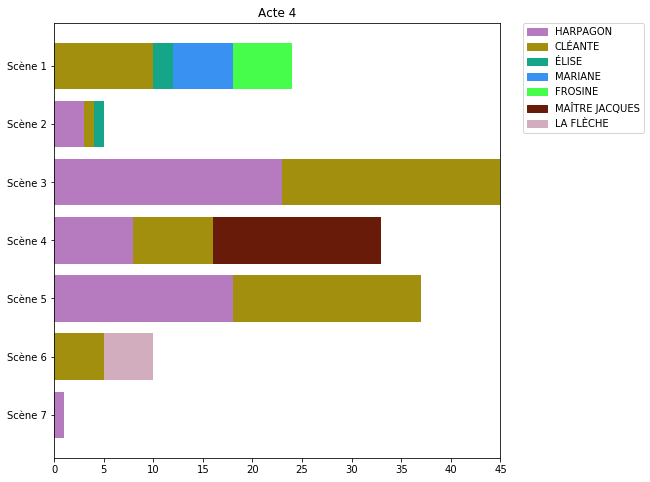

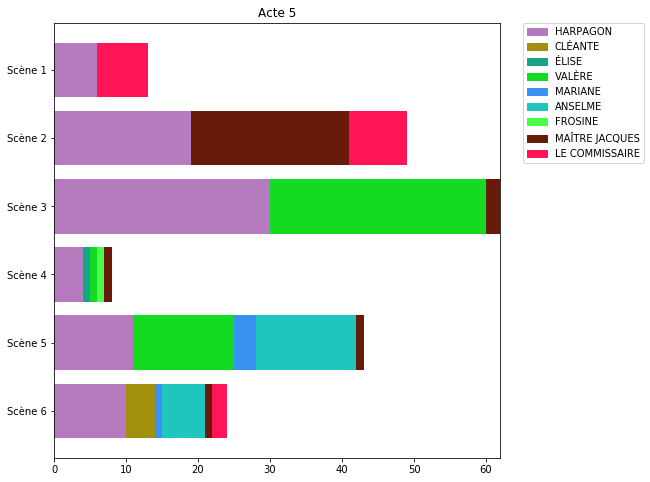

In [29]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

colors = np.random.rand(14,3)
for acte in range(1,6) :
    plt.figure(figsize=(8,8))
    x = np.zeros((len(dico_acte[acte]),len(persos)))
    labels = persos
    for scene in range(1,len(dico_acte[acte])+1) :
        for l,perso in enumerate(persos) :
                x[scene-1,l] += dico_acte[acte][scene][perso]
    plt.title('Acte ' + str(acte))
    #plt.bar(labels,x)
    width = 1/2  # épaisseur de chaque bâton
    # Création du diagramme en bâtons (bâtons côte à côte)
    for scene in range(1,len(dico_acte[acte])+1) :
        bt = 0
        for l,perso in enumerate(persos) :
            plt.barh(-scene, x[scene-1,l],left = bt,color=colors[l])
            bt += x[scene-1,l]
    plt.yticks(-np.arange(scene)-1, np.array(["Scène "+str(k) for k in range(1,scene+1)]))
    patches = []
    for l,perso in enumerate(persos):
        if acte in Nombre_actes[perso] :
            patches.append(mpatches.Patch(color=colors[l], label=perso[4:-2]))
    plt.legend(handles=patches,bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)